In [170]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 


In [171]:
times_average = pd.read_csv("time_analysis.csv", sep=",",encoding ="utf-16" )
times_average

,Unnamed: 0,Mean time,Unnamed: 2,Unnamed: 3,Mean time when exact reached,Unnamed: 5,Unnamed: 6,Count when exact reached,Unnamed: 8,Unnamed: 9
0,algorithm,0.000000,0.001000,0.010000,0.000000,0.001000,0.010000,0,0.001,0.01
1,RILS-ROLS,1527.000000,809.000000,656.000000,228.000000,108.000000,167.000000,788,547.000,452.00
2,AFP,3968.284131,3498.852497,3745.832610,638.960309,2801.665511,3290.948520,213,247.000,212.00
3,AFP_FE,22497.120212,24426.283011,25790.148378,1980.409776,23732.209319,25714.138855,341,276.000,260.00
4,AIFeynman,28542.073762,29242.776077,29064.310616,25131.891681,29200.165072,29283.526868,644,399.000,152.00
5,BSR,28252.617462,28218.856439,28245.638525,28194.388345,26683.719706,28800.670340,24,8.000,1.00
6,DSR,2079.955148,731.157545,773.551479,232.290069,622.803725,645.102315,205,249.000,246.00
7,EPLEX,12946.898053,10943.755794,10028.986104,652.711032,12664.491612,8659.929603,125,124.000,107.00
8,FEAT,2273.480600,1598.854931,1356.344345,1359.175191,NaN,NaN,1,0.000,0.00
9,FFX,25.698957,29.177990,36.285048,NaN,NaN,NaN,0,0.000,0.00


In [172]:
########## parse results: 
ALGORITHMS = ["AIFeynman", "Operon", "AFP_FE", "AFP", "BSR", "DSR", "EPLEX", "FEAT", "FFX", "GP-GOMEA", "ITEA", "MRGP", "SBP-GP", "gplearn"   ]
NOISE_LEVEL = 0.01
###################################################################################

times_average.columns = list(range(0,  10))


In [173]:
times_average_reach_exacteness = times_average[[0, 4, 5, 6, 7, 8, 9]]

In [174]:
times_average_reach_exacteness_level = None 

if NOISE_LEVEL == 0.0:
    times_average_reach_exacteness_level = times_average_reach_exacteness[[0, 4, 7]]
    times_average_reach_exacteness_level = times_average_reach_exacteness_level.iloc[1:]
    times_average_reach_exacteness_level[[7]] = times_average_reach_exacteness_level[[7]].apply(lambda x: x / 1300.0 * 100 )
elif NOISE_LEVEL == 0.001:
    
    times_average_reach_exacteness_level = times_average_reach_exacteness[[0, 5, 8]][1:]
    times_average_reach_exacteness_level[[8]] = times_average_reach_exacteness_level[[8]].apply(lambda x: (x / 1300.0) * 100 )
    print(times_average_reach_exacteness_level)

else:
    times_average_reach_exacteness_level = times_average_reach_exacteness[[0, 6, 9]]
    times_average_reach_exacteness_level[[9]] = times_average_reach_exacteness_level[[9]].apply(lambda x: x / 1300.0 * 100 )

 
times_average_reach_exacteness_level.columns = ["Algorithm", "Avg. time", "pct"]


# times_average_reach_exacteness_level = times_average_reach_exacteness_level.iloc[1:]


/tmp/ipykernel_72034/666251791.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  times_average_reach_exacteness_level[[9]] = times_average_reach_exacteness_level[[9]].apply(lambda x: x / 1300.0 * 100 )


In [175]:
########## fiter, exaceness >= 5%
times_average_reach_exacteness_level_filter = times_average_reach_exacteness_level[times_average_reach_exacteness_level["pct"]> 5.0]

times_average_reach_exacteness_level_filter                                                              

,Algorithm,Avg. time,pct
1,RILS-ROLS,167.000000,34.769231
2,AFP,3290.948520,16.307692
3,AFP_FE,25714.138855,20.000000
4,AIFeynman,29283.526868,11.692308
6,DSR,645.102315,18.923077
7,EPLEX,8659.929603,8.230769
11,ITEA,1462.752141,7.692308
15,gplearn,1078.397253,15.923077


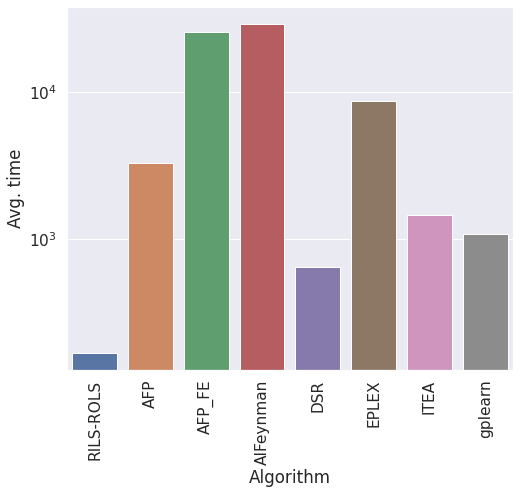

In [176]:
 ################## draw plot:
import seaborn as sns 

plt.figure(figsize=(8, 8))
sns.barplot(data = times_average_reach_exacteness_level_filter, x = "Algorithm", y = "Avg. time" )
sns.set(font_scale = 1.4)
plt.yscale('log')
plt.xticks(rotation=90)
plt.subplots_adjust(bottom=0.25)
plt.savefig("time-avg-noise" + str(NOISE_LEVEL) + ".eps")
